In [39]:
import numpy as np
import os
import keras
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
folders = os.listdir("animals")

In [6]:
folders

['dogs', 'cats', '.DS_Store', 'humans', 'horses']

In [8]:
animals = folders[:2]+folders[3:]

In [9]:
animals

['dogs', 'cats', 'humans', 'horses']

In [38]:
sample_path = "animals/cats/cat.1.jpg"
img = image.load_img(sample_path)

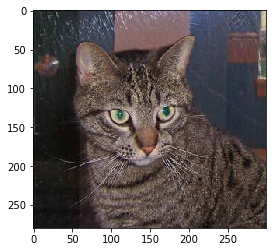

In [40]:
plt.imshow(img)

In [11]:
train_gen = ImageDataGenerator(rescale=1/255.0,
                              rotation_range=40,
                              zoom_range=0.3,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              horizontal_flip=True)

In [13]:
train_generator = train_gen.flow_from_directory("animals",
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')

Found 808 images belonging to 4 classes.


In [41]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [45]:
adam = optimizers.adam(lr=1e-4)
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["acc"])

In [46]:
hist = model.fit_generator(train_generator,epochs=100,steps_per_epoch=7)

Epoch 1/100
7/7 [==============================] - 5s 650ms/step - loss: 1.3842 - acc: 0.2946
Epoch 2/100
7/7 [==============================] - 3s 437ms/step - loss: 1.3952 - acc: 0.2700
Epoch 3/100
7/7 [==============================] - 3s 459ms/step - loss: 1.3833 - acc: 0.2679
Epoch 4/100
7/7 [==============================] - 3s 459ms/step - loss: 1.3475 - acc: 0.3080
Epoch 5/100
7/7 [==============================] - 3s 482ms/step - loss: 1.3416 - acc: 0.3348
Epoch 6/100
7/7 [==============================] - 3s 429ms/step - loss: 1.2922 - acc: 0.3800
Epoch 7/100
7/7 [==============================] - 3s 457ms/step - loss: 1.2399 - acc: 0.4196
Epoch 8/100
7/7 [==============================] - 3s 463ms/step - loss: 1.2160 - acc: 0.4911
Epoch 9/100
7/7 [==============================] - 3s 477ms/step - loss: 1.1713 - acc: 0.4866
Epoch 10/100
7/7 [==============================] - 3s 458ms/step - loss: 1.2154 - acc: 0.4375
Epoch 11/100
7/7 [==============================] - 3s 414m

7/7 [==============================] - 3s 490ms/step - loss: 0.7061 - acc: 0.7143
Epoch 88/100
7/7 [==============================] - 3s 426ms/step - loss: 0.7703 - acc: 0.6900
Epoch 89/100
7/7 [==============================] - 3s 471ms/step - loss: 0.7722 - acc: 0.6652
Epoch 90/100
7/7 [==============================] - 3s 479ms/step - loss: 0.7945 - acc: 0.6562
Epoch 91/100
7/7 [==============================] - 3s 487ms/step - loss: 0.8314 - acc: 0.6473
Epoch 92/100
7/7 [==============================] - 3s 422ms/step - loss: 0.6914 - acc: 0.7400
Epoch 93/100
7/7 [==============================] - 3s 468ms/step - loss: 0.7202 - acc: 0.7500
Epoch 94/100
7/7 [==============================] - 3s 483ms/step - loss: 0.6398 - acc: 0.7411
Epoch 95/100
7/7 [==============================] - 3s 487ms/step - loss: 0.8120 - acc: 0.6830
Epoch 96/100
7/7 [==============================] - 3s 466ms/step - loss: 0.6983 - acc: 0.6964
Epoch 97/100
7/7 [==============================] - 3s 485ms/st

In [47]:
loss,accuracy = model.evaluate(train_generator)
print("The current loss is: ",loss)
print("The current accuracy is: ",accuracy)

26/26 [==============================] - 5s 193ms/step
The current loss is:  0.7209532260894775
The current accuracy is:  0.6967821717262268


In [48]:
#lets do 100 more epochs
hist = model.fit_generator(train_generator,epochs=100,steps_per_epoch=7)

Epoch 1/100
7/7 [==============================] - 3s 469ms/step - loss: 0.7257 - acc: 0.6518
Epoch 2/100
7/7 [==============================] - 3s 439ms/step - loss: 0.6921 - acc: 0.7321
Epoch 3/100
7/7 [==============================] - 3s 437ms/step - loss: 0.7816 - acc: 0.6964
Epoch 4/100
7/7 [==============================] - 3s 415ms/step - loss: 0.6989 - acc: 0.7200
Epoch 5/100
7/7 [==============================] - 3s 471ms/step - loss: 0.6724 - acc: 0.7098
Epoch 6/100
7/7 [==============================] - 3s 455ms/step - loss: 0.6691 - acc: 0.7143
Epoch 7/100
7/7 [==============================] - 3s 401ms/step - loss: 0.6029 - acc: 0.7300
Epoch 8/100
7/7 [==============================] - 3s 410ms/step - loss: 0.7335 - acc: 0.7100
Epoch 9/100
7/7 [==============================] - 3s 471ms/step - loss: 0.7270 - acc: 0.7366
Epoch 10/100
7/7 [==============================] - 3s 450ms/step - loss: 0.7381 - acc: 0.6786
Epoch 11/100
7/7 [==============================] - 3s 448m

7/7 [==============================] - 3s 450ms/step - loss: 0.5645 - acc: 0.7900
Epoch 88/100
7/7 [==============================] - 3s 467ms/step - loss: 0.4942 - acc: 0.8125
Epoch 89/100
7/7 [==============================] - 3s 450ms/step - loss: 0.5437 - acc: 0.7500
Epoch 90/100
7/7 [==============================] - 3s 474ms/step - loss: 0.5029 - acc: 0.7946
Epoch 91/100
7/7 [==============================] - 3s 444ms/step - loss: 0.5311 - acc: 0.7850
Epoch 92/100
7/7 [==============================] - 3s 464ms/step - loss: 0.5228 - acc: 0.8080
Epoch 93/100
7/7 [==============================] - 3s 453ms/step - loss: 0.5439 - acc: 0.7857
Epoch 94/100
7/7 [==============================] - 3s 484ms/step - loss: 0.7002 - acc: 0.7232
Epoch 95/100
7/7 [==============================] - 3s 440ms/step - loss: 0.5421 - acc: 0.7850
Epoch 96/100
7/7 [==============================] - 3s 455ms/step - loss: 0.5997 - acc: 0.7500
Epoch 97/100
7/7 [==============================] - 3s 460ms/st

In [49]:
loss,accuracy = model.evaluate(train_generator)
print("The new loss is: ",loss)
print("The new accuracy is: ",accuracy)

26/26 [==============================] - 6s 213ms/step
The new loss is:  0.3036276698112488
The new accuracy is:  0.7945544719696045
